In [103]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [104]:

#IMPORT DATASET
dataset=pd.read_csv('C:/Users/hp/Desktop/FYP/MlDataset/CarPrice_Assignment.csv')
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [105]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [106]:
# Don't need CarName only Comapny Name
dataset['CarName']= dataset['CarName'].apply(lambda x: x.split(' ')[0]) #Splits in a list comapny and name and we only need coampny so index [0]
dataset.rename(index=str,columns={'CarName':'Company'},inplace=True)

#Calculate Total MPG and drop city and highway also  drop car_id
dataset['total_mpg']=(55*dataset['citympg']/100)+(45*dataset['highwaympg']/100)
dataset.drop(['car_ID','citympg','highwaympg'],axis=1,inplace=True)

#Symboling is string
dataset['symboling'] = dataset['symboling'].astype(str) # can be like data['symboling']
    

In [107]:

dataset['Company'].unique() 

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [110]:
dataset.Company= dataset.Company.str.lower()

def replace_name(a,b):
    dataset.Company.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

dataset.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [111]:
dataset.columns

Index(['symboling', 'Company', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'total_mpg'],
      dtype='object')

<AxesSubplot:>

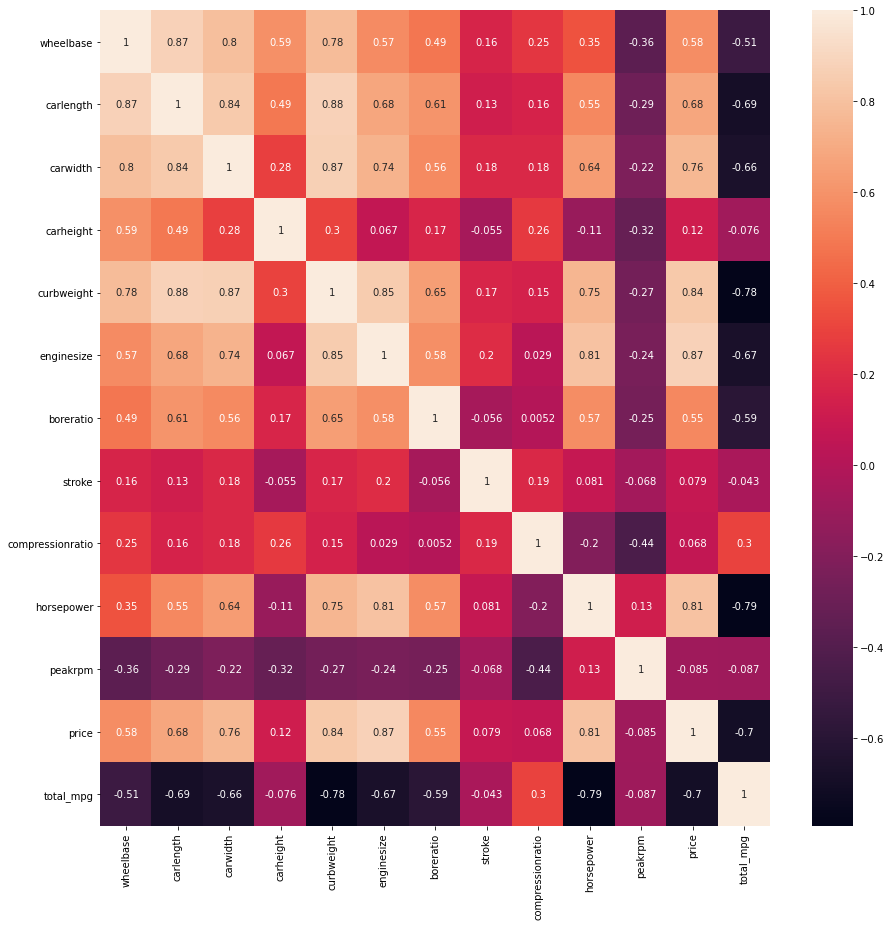

In [112]:
import seaborn as sns
plt.figure(figsize=[15,15])
sns.heatmap(dataset.corr(),annot=True)

In [113]:
#Binning the Car Companies based on avg prices of each Company.
dataset['price'] = dataset['price'].astype('int')
temp = dataset.copy()
table = temp.groupby(['Company'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='Company')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
dataset['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
dataset.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,total_mpg,carsrange
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,13495,23.70,NaN
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,16500,23.70,NaN
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,16500,22.15,NaN
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,13950,26.70,NaN
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,17450,19.80,NaN


In [114]:
X = dataset[['fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'total_mpg' ,'carlength','carwidth', 'carsrange']]
X.shape


(205, 15)

In [115]:
Y=dataset[['price']]
Y

,price
0,13495
1,16500
2,16500
3,13950
4,17450
...,...
200,16845
201,19045
202,21485
203,22470


In [116]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

X = dummies('fueltype',X)
X = dummies('aspiration',X)
X = dummies('carbody',X)
X= dummies('drivewheel',X)
X = dummies('enginetype',X)
X= dummies('cylindernumber',X)
X = dummies('carsrange',X)

In [117]:
X.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,total_mpg,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,...,1,0,0,0,1,0,0,0,0,0
3,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,...,0,0,0,1,0,0,0,0,0,0
4,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,...,0,0,1,0,0,0,0,0,0,0


In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','total_mpg','carlength','carwidth']
X[num_vars] = scaler.fit_transform(X[num_vars])
X.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,total_mpg,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,0.058309,0.411171,0.260377,0.664286,0.262500,0.244170,0.413433,0.316667,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.058309,0.411171,0.260377,0.664286,0.262500,0.244170,0.413433,0.316667,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.230321,0.517843,0.343396,0.100000,0.441667,0.201646,0.449254,0.433333,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0.384840,0.329325,0.181132,0.464286,0.225000,0.326475,0.529851,0.491667,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.373178,0.518231,0.283019,0.464286,0.279167,0.137174,0.529851,0.508333,1,0,...,0,0,1,0,0,0,0,0,0,0


In [119]:
scaler1= MinMaxScaler()
Y=scaler.fit_transform(Y)

In [120]:
Y

array([[2.07958890e-01],
       [2.82557966e-01],
       [2.82557966e-01],
       [2.19254257e-01],
       [3.06141701e-01],
       [2.51526737e-01],
       [3.12596197e-01],
       [3.42634427e-01],
       [4.65642222e-01],
       [3.16295119e-01],
       [2.80820217e-01],
       [2.93108584e-01],
       [3.93525644e-01],
       [3.96877017e-01],
       [4.82771461e-01],
       [6.36562236e-01],
       [8.98589941e-01],
       [7.88491137e-01],
       [8.19224468e-04],
       [2.92190060e-02],
       [3.61700015e-02],
       [1.12705427e-02],
       [3.12546547e-02],
       [7.04781292e-02],
       [2.75805571e-02],
       [3.90745246e-02],
       [6.18390348e-02],
       [8.53979445e-02],
       [9.44094136e-02],
       [1.94776823e-01],
       [3.37868030e-02],
       [4.31209970e-02],
       [6.97582047e-03],
       [3.50280522e-02],
       [4.99230426e-02],
       [5.40439899e-02],
       [5.40439899e-02],
       [6.89389802e-02],
       [9.87289608e-02],
       [9.25227149e-02],


In [121]:
m=np.size(X,0)
m
X=np.array(X)
X0=np.ones(m)
X=np.insert(X,0,X0,axis=1)

In [122]:
n=np.size(X,1)
n

31

In [135]:
import random
theeta = np.random.randn(n)
theeta

array([ 0.20652365, -0.14987671, -0.27414855,  0.09997378, -0.14532811,
       -0.0337926 ,  0.16841753, -1.34000886, -1.57112922, -1.99450462,
       -2.02779607,  0.62361741, -0.79700817, -0.35356304, -0.81660857,
       -0.123546  , -0.5241157 , -1.01219384, -0.31250958, -1.18075953,
       -0.38987059,  1.23056798, -0.03143331,  0.198721  , -0.26741498,
        0.21810651,  2.11669303,  0.18270574, -1.50515448, -0.04638317,
        0.79036892])

In [174]:
import sklearn.metrics as sm
costArr=[]
alpha=0.3


In [175]:

def yPredict(theeta,x):
    return np.dot(theeta,x)


In [176]:
#print(yPredict(theeta,X[6]))
#FUNCTION TO CALCULATE COST
def cost(theeta,Y,X):
    sum=0
    for i in range(m):
        sum=sum+pow((yPredict(theeta,X[i])-Y[i]),2)
    return sum/(2*m)


In [177]:


#FUNCTION TO CALCULATE GARDIENT
def gradient(theta,x, y):
  
  for j in range(n):
    sum = 0
    for i in range(m):
      sum += ((yPredict(theta, x[i]) - y[i] ) * x[i][j])
    theta[j] = theta[j] - alpha * (sum / m) 
  return theta



#FUNCTION TO CALCULATE MINIMUM THEETA 
def multiGradientDescendent(X,Y,theeta,alpha):
    for i in range(1000):
        print(i)
        costArr.append(cost(theeta,Y,X))
        theeta =gradient(theeta, X,Y)
    return theeta
res=multiGradientDescendent(X,Y,theeta,alpha)
res


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([ 0.38326536,  0.42659134,  0.22416234,  0.17447028, -0.15279924,
        0.69797529, -0.26634853, -0.40858065,  0.16581427, -0.16648354,
       -0.09438502, -0.10680177, -0.17113713, -0.13043459, -0.162884  ,
       -0.00698678,  0.01628571, -0.3223469 , -0.09658375,  0.06537268,
        0.11563355, -0.06789192,  0.72468025, -0.10398835, -0.06369173,
       -0.07878621,  0.64438449, -0.11825201, -0.75013565, -0.04638317,
        0.79036892])

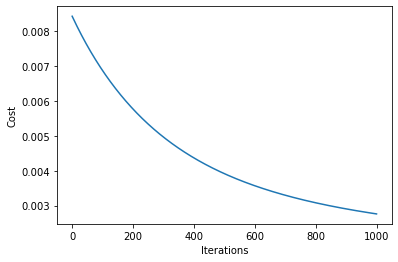

In [181]:
#costArr=np.reshape(costArr,(1000))
costArr
plt.plot(range(0,1000),costArr)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [179]:

prices=[]
for i in range(m):
    prices.append(yPredict(theeta,X[i]))
prices
prices=np.reshape(prices,(m))
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(Y, prices), 2))


R2 score = 0.86
